### Paso 1: Planteamiento del problema y recopilación de datos

In [2]:
###################################
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import numpy as np
import json

current_dir = os.getcwd()
path_config = os.path.join(current_dir, "../models")
url = os.path.join(current_dir, "../data/raw/diabetes.csv")
pd.set_option('display.max_columns', None)
data = pd.read_csv(url, sep=",")
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
pd.reset_option('display.max_columns')

In [4]:
# Comentarios
#loan y housing -> tiene prestamo
# DEFINIR EL PROBLEMA: POR DEFECTO [LISTAS VACÍAS]
target = "Outcome"    # el target u objetivo del modelo. 
categorical_variable = []  # Variables categóricas
drop_columns = [] # columnas para hacer drop por falta de relevancia
factors_associated_target = ['BMI','Age','Glucose']   # factores asociados al target. Relación del target con las predictoras. Subjetivo.



Se decide eliminar las siguientes columnas:.

### Paso 2: Exploración y limpieza de datos

In [5]:
# Obtener las dimensiones
data.shape

(768, 9)

In [6]:
# Obtener información sobre tipos de datos y valores no nulos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
nan = data.isna().sum().sort_values(ascending=False)
nan

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

- Existen un total de 768 filas y 9 columnas, de entre las que encontramos el objetivo o clase a predecir, `Outcome`.
- No hay valores nulos, el resto de variables cuentan siempre con valor.
- Los datos cuentan con 8 características numéricas y 0 características categóricas.

#### Eliminar duplicados
Se decide eliminar `drop_columns`, ya que se observa son poco o nada relevantes para el target.

In [9]:
drop_columns

[]

In [10]:
nan_percentage = data.isna().mean()*100
# Identificar las columnas con más del 90% de NaN y eliminarlas directamente
columns_to_drop = nan[nan_percentage > 90].index
print(columns_to_drop)
# Eliminar las columnas
data_cleaned = data.drop(columns=columns_to_drop, axis=1)

data

Index([], dtype='object')


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [11]:
duplicated_row = data.duplicated().sum()
duplicated_row

np.int64(0)

In [12]:

if(duplicated_row==0):
    print("No hay duplicados")
else:
    print("Si hay duplicados, se procede a eliminarlos")

No hay duplicados


No se encuentran valores duplicados.

In [13]:
# data = data.drop_duplicates(subset = data.columns.difference(["id"]))
# data.shape

In [14]:
# ELIMINAR DUPLICADOS, ESPECIFICAR CON .difference(["id"] SI ES NECESARIO
data = data.drop_duplicates(subset = data.columns)
print(data.shape)
data.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Se procede a eliminar las columnas que hayamos definido en `drop_columns` cuando hemos definido el problema.

In [15]:
if(len(drop_columns) > 0):   # si drop_columns tiene valores y no está vacío entra
    data = data.drop(drop_columns, axis = 1)
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [16]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Paso 3: Análisis de variables univariante

#### Análisis sobre variables categóricas

In [17]:
categorical_variable

[]

Variables categóricas
Una **variable categórica** es un tipo de variable que puede tomar uno de un número limitado de categorías o grupos. Estos grupos son a menudo nominales (por ejemplo, el color de un coche: rojo, azul, negro, etc, pero ninguno de estos colores es inherentemente "mayor" o "mejor" que los demás) pero pueden también representarse mediante números finitos.

Para representar este tipo de variables utilizaremos histogramas. Antes de comenzar a graficar, debemos identificar cuáles son categóricas, y se puede comprobar fácilmente analizando el rango de valores. En este caso, las variables categóricas son:
 No hay ninguna.

In [18]:
if(categorical_variable):
    fig, axis = plt.subplots(len(categorical_variable), 1,figsize = (15, 5*len(categorical_variable)))

    if len(categorical_variable) == 1:
        axis = [axis]   # convertir en lista para que no me salga error

    for i,col in enumerate(categorical_variable):
        # Crear un histograma múltiple
        sns.histplot( data = data, ax=axis[i], x = col)
        axis[i].set_title(f'Histograma de {col}')
        # grid
        plt.grid(linestyle="--", alpha=0.7)
        # Ajustar el layout
        plt.tight_layout()

        # Rotación automática de las etiquetas del eje X si es necesario.
        # category_counts = data[col].value_counts() # Contar las categorías en la columna.
        # if len(category_counts) > 20: # Si hay más de 20 categorías, eliminar las etiquetas del eje X
        #     axis[i].set_xticklabels([])
        # elif len(category_counts) >= 8:
        #     for label in axis[i].get_xticklabels(): # Si hay más de 10 categorías pero menos de 20, rotar las etiquetas del eje X

    # Mostrar el plot
    plt.show()
else:
    print("categorical_variable está vacío, debe llenarse para poder representarse")

categorical_variable está vacío, debe llenarse para poder representarse


In [19]:
categorical_variable

[]

No hay predictoras categóricas.
***


#### Análisis sobre variables numéricas

Antes de comenzar a graficar, debemos identificar cuáles son las numéricas, que son 8. Se procede a graficar de forma automática:

In [20]:
data.select_dtypes(include='number').columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

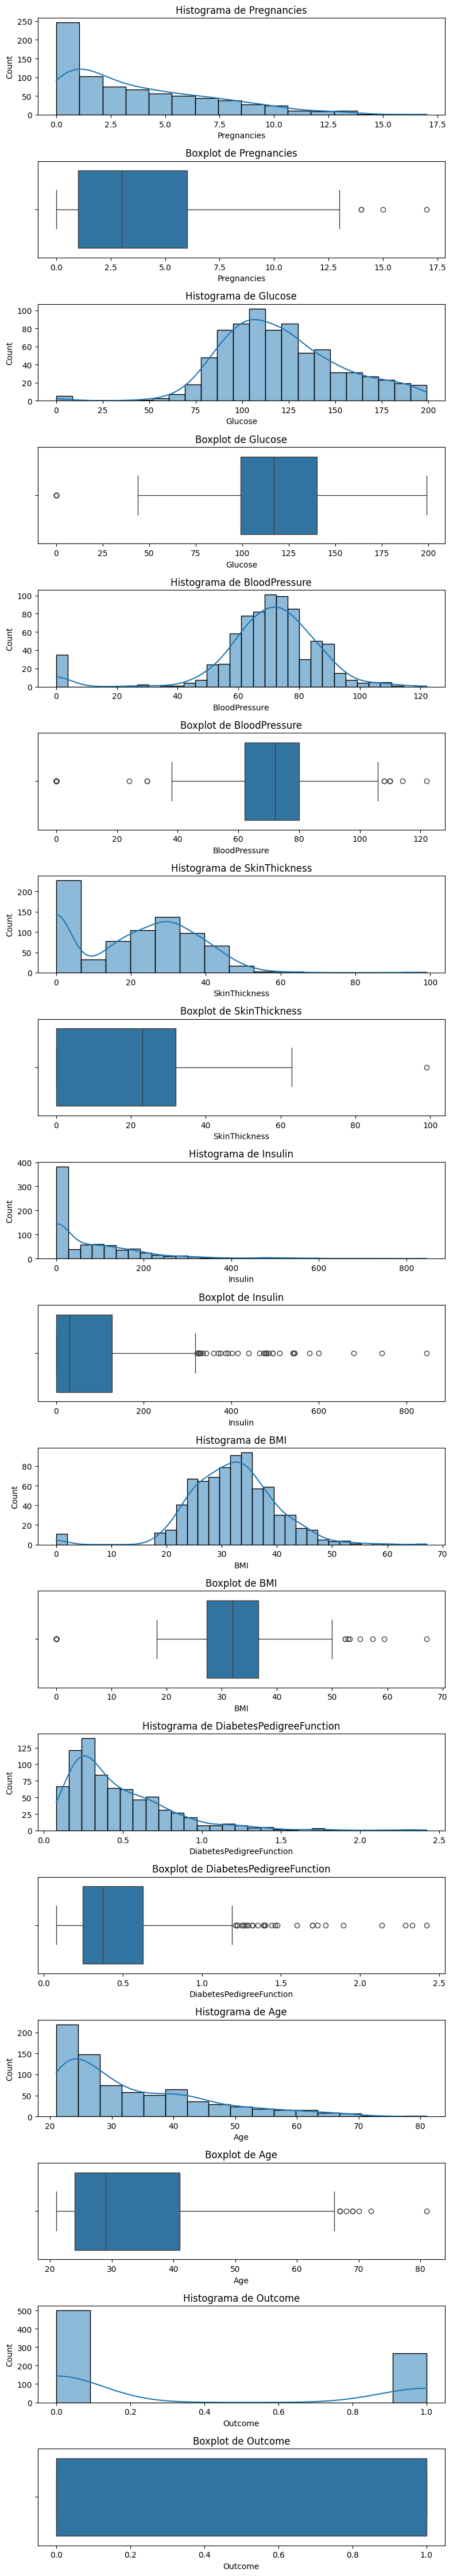

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
# SOLO MODIFICAR COLUMNAS QUE SE QUIERAN EXCLUIR DE LAS NUMERICAS []
column_filter= data.select_dtypes(include='number').drop(columns=[''], errors='ignore').columns
# Crear la figura con 2 columnas y una fila por variable
fig, axes = plt.subplots(len(column_filter)*2, 1, figsize=(8, len(column_filter) * 5))

# Iterar sobre cada columna del DataFrame
for i, col in enumerate(column_filter):
    idx=i*2
    # Histograma en la primera fila
    sns.histplot(data=data, x=col, kde=True, ax=axes[idx])
    axes[idx].set_title(f'Histograma de {col}')
    
    # set_limitx -> ajustar gráficos si interesa. Ver si sería interesante hacerlo
    # if col in x_limits:
    #     axis[idx+1].set_xlim(x_limits[col])

    # Boxplot en la segunda fila
    sns.boxplot(data=data, x=col, ax=axes[idx+1])
    axes[idx+1].set_title(f'Boxplot de {col}')
    

# Ajustar diseño
plt.tight_layout()
plt.show()

In [22]:
data.select_dtypes(include='number').columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

- age: Se observa una distribución normal sesgada hacia la izquierda con media en 38 años.
- duration: Se observa que el 75% de las muestras se encuentran en valores menores de 319 segundos, con una media de 258 segundos.
- campaign: El 75% de los valores se encuentra en valores menores a 3 contactos al cliente en la campaña actual, con una media de 2,56.
- pdays: Se observa una gran concentración en valores cercanos a 1000, siendo los valores restantes outliers cercanos a 0.
- previous: Se observa una gran concentración en el 0, por lo que se realizaron 0 contactos en la campaña anterior al cliente.
- emp.var.rate: La tasa de variación del empleo tiene una concentración de valores del 75% entre el -3,4% y el 1,4%, siendo la media 0,082. Existen picos en varios puntos, lo que indica que los datos están agrupados en ciertos valores de la tasa de variación del empleo, se observa una distribución multimodal con 3 picos significativos. El rango intercuartil (IQR), con valores mínimos y máximos dentro del bigote extendiéndose hasta los valores atípicos.
- cons.price.idx: El índice de precios al consumidor se encuentran el Q1 y el Q3 entre el 93% y 94%, situándose la media en 93,57%. Se observan múltiples picos, lo que sugiere que los valores están distribuidos en ciertos rangos específicos. Existen valores extremos en ambos extremos.
- cons.conf.idx: Índice de confianza del consumidor, se encuentra en valores negativos en media un -40,5%. Se sitúa el Q1 en -42,7% y el Q3 en -36,4%.
- euribor3m:La tasa de euribor 3 meses, se encuentra en media de 3,62%, además de un Q1 de 1,34% y un Q3 de 4,96%
- nr.employed: Número de empleados, se situa en media de 5167 empleados.


La combinación de los dos gráficos anteriores por cada variable nos permite conocer la distribución y sus características estadísticas. De la visualización resultante podemos ver que gran parte siguen una distribución normal, unas pocas siguen una distribución normal sesgada a la izquierda.

### Paso 4: Análisis de variables multivariante

Tras analizar las características una a una, es momento de analizarlas en relación con la predictora y con ellas mismas, para sacar conclusiones más claras acerca de sus relaciones y poder tomar decisiones sobre su procesamiento.

Así, si quisiéramos eliminar una variable debido a una alta cantidad de valores nulos o ciertos outliers, es necesario antes aplicar este proceso para asegurar que la eliminación de ciertos valores no son críticos. 

#### Análisis numérico-numérico

Para comparar dos columnas numéricas se utilizan diagramas de dispersión y análisis de correlaciones.
##### Target: anycondition_number - 108 columnas numéricas

In [23]:
data.select_dtypes(include='number').columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [24]:
# Automatizado para solo filtrar los numericos a numericos y excluir que se compare el objetivo o clase a predecir, es decir, price consigo mismo
# if(target):
    

#     # if pd.api.types.is_numeric_dtype(data[target]):
#     #     print("La columna es numérica.")
#     # else:
#     #     print("La columna NO es numérica.")
#     column_filter= data.select_dtypes(include='number').drop(columns=[target], errors='ignore').columns
#     num_vars = len(column_filter)
#     fig, axis = plt.subplots(num_vars, 2, figsize = (10, 7*num_vars), squeeze=False)

#     # Crear un diagrama de dispersión múltiple y la matriz de correlación entre las dos variables (predictora-target)
#     for i,col in enumerate(column_filter):
#         sns.regplot(ax = axis[i, 0], data = data, x = col, y = target)
#         sns.heatmap(data[[target, col]].corr(), annot = True, fmt = ".2f", ax = axis[i,1], cbar = True)

#     # Ajustar el layout
#     plt.tight_layout()

#     # Mostrar el plot
#     plt.show()
# else:
#     print(f"target {target} está vacío, se debe especificar el target para poder representar.")

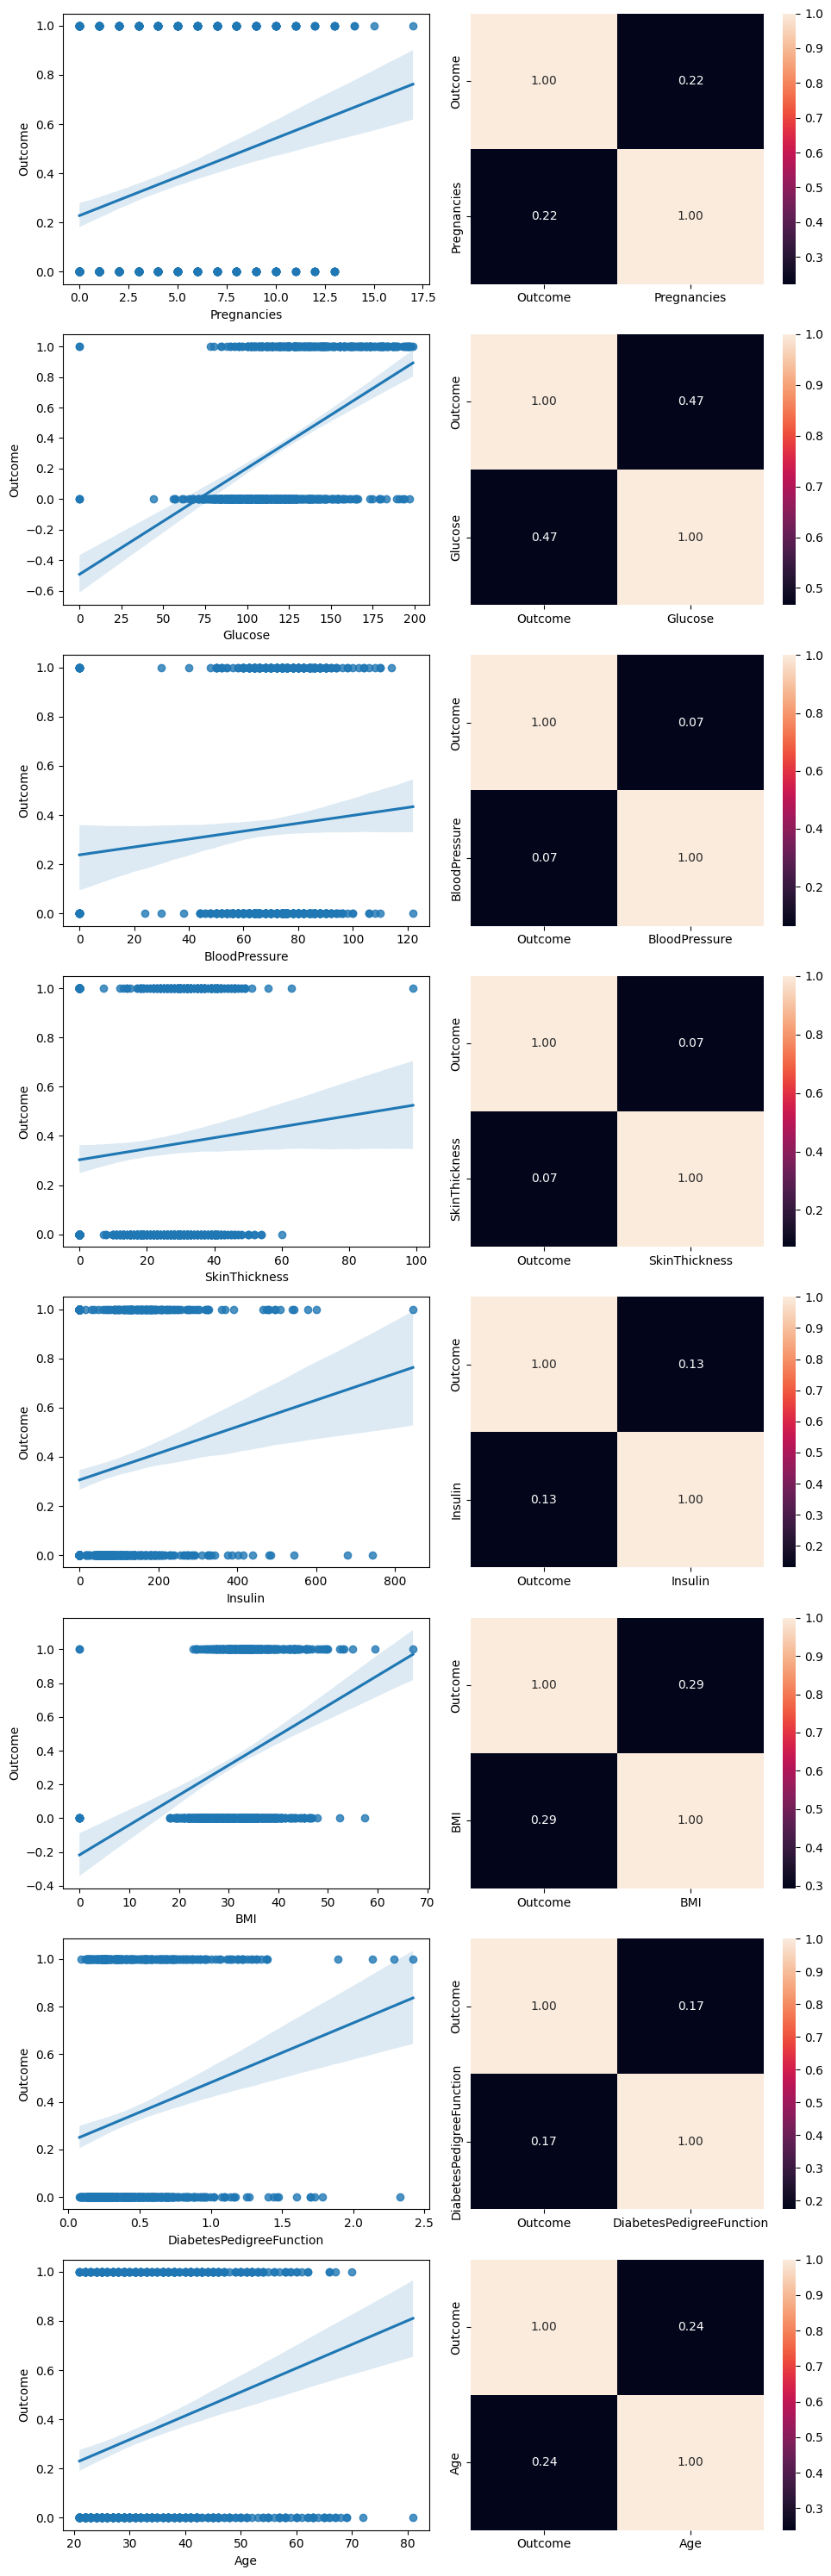

In [25]:
page_size = 10  # Máximo de gráficos por página
column_filter= data.select_dtypes(include='number').drop(columns=[target], errors='ignore').columns
num_vars = len(column_filter)
num_pages = int(np.ceil(num_vars / page_size))

# Automatizado para solo filtrar los numericos a numericos y excluir que se compare el objetivo o clase a predecir, es decir, target consigo mismo
if(target):
    for page in range(num_pages):
        start = page * page_size
        end = min(start + page_size, num_vars)
        
        fig, axis = plt.subplots(end-start, 2, figsize=(10, min(7*(end-start), 30)), squeeze=False)

        for i, col in enumerate(column_filter[start:end]):
            sns.regplot(ax=axis[i, 0], data=data, x=col, y=target)
            sns.heatmap(data[[target, col]].corr(), annot=True, fmt=".2f", ax=axis[i, 1], cbar=True)

        plt.tight_layout()
        plt.show()
else:
    print(f"target {target} está vacío, se debe especificar el target para poder representar.")

- edad: No presenta una correlación con el target. Tiene poca pendiente.
- ``duration``: Se observa una correlación elevada del 0,41 y presenta una gran pendiente, por lo que existe una gran correlación con el target. A mayor duración más probabilidades de que el cliente acepte un depósito a largo plazo.
- campaign: No presenta una correlación con el target. Tiene poca pendiente. Se observa una correlación negativa, por lo que es inversa al objetivo, lo cuál tiene poco sentido si se tiene en cuenta que son contactos al cliente en la campaña actual
- ``pdays``: Presenta una gran correlación inversa (-0,32). Si han pasado muchos días la probabilidad de que el cliente acepte el depósito es menor.
- ``previus``: Presenta una correlación moderada (0,23) con el target. Si el cliente ha sido contactado en el pasado y ha mostrado interés, hay más probabilidades de que acepte la oferta en la campaña actual. Posible relación con poutcome, si en la campaña anterior el cliente aceptó es probable que lo haga de nuevo.
- ``emp.var.rate``: Presenta una gran correlación inversa (-0,3). Cuando el empleo mejora los clientes son menos propensos a contratar un depósito.
- ``cons.price.idx``: Presenta una correlación inversa moderada (-0,14). Si el índice de precios es alto, hay menos probabilidades de contratar un depósito (un alto costo de vida reduce la cantidad de dinero disponible para inversiones).
- cons.conf.idx: No presenta una correlación con el target. Tiene poca pendiente.
- ``euribor3m``: Presenta una gran correlación inversa (-0,31). Cuando la tasa EURIBOR sube, los clientes son menos propensos a aceptar el depósito (con un euribor alto puede indicar que hay mejores oportunidades de inversión en el mercado)
- ``nr.empoyed``: Presenta una gran correlación inversa (-0,35). Cuanto mayor número de empleados, menos clientes aceptan el depósito.
- job_n: No presenta una correlación con el target. Tiene poca pendiente.
- marital_n: No presenta una correlación con el target. Tiene poca pendiente.
- education_n: No presenta una correlación con el target. Tiene poca pendiente.
- default_n: No presenta una correlación con el target. Tiene poca pendiente. Se observa una correlación negativa, por lo que es inversa al objetivo, lo cuál tiene poco sentido si se tiene en cuenta que son contactos al cliente en la campaña actual.
- housing_n: No presenta una correlación con el target. Tiene poca pendiente.
- loan_n: No presenta una correlación con el target. Tiene poca pendiente. Se observa una correlación negativa, por lo que es inversa al objetivo, lo cuál tiene poco sentido si se tiene en cuenta que son contactos al cliente en la campaña actual.
- contact_n: No presenta una correlación con el target. Tiene poca pendiente.
- ``poutcome_n``: Presenta una relación de correlación moderada (0,27). Si el cliente tuvo un buen resultado en la campaña anterior, es más probable que acepte ahora.

Se observa que la probabilidad de contratar un depósito a largo plazo tiene una correlación con las siguientes variables, con una correlación positiva (`duration, previous, poutcome_n`) y con una correlación negativa (`pdays, emp.var.rate, euribor3m, nr.employed`).

Factores macroeconómicos afecta a la decisión del cliente, en tiempos de crisis (alta tasa de desempleo, bajos índices económicos), la gente busca depósitos más seguros. 

#### Análisis categórico-categórico 

In [26]:
categorical_variable

[]

In [27]:
if(target):
    if(pd.api.types.is_numeric_dtype(data[target])):    # es numérico
        print("El target es numérico y por tanto no es necesario hacer el análisis categórico-categórico")
    else:
        n_rows = (len(categorical_variable)+2) // 3 + 1
        n_cols = 3
        fig, axis = plt.subplots(n_rows, n_cols, figsize = (15, n_rows*5))
        category_counts = data[col].value_counts() # Contar las categorías en la columna.
            
        # Crear un histograma de cada variable categórica predictora con la variable target categórica
        for i,col in enumerate(categorical_variable):
            idx = i // n_cols
            j = i % 3
            sns.countplot(ax=axis[idx,j], data = data, x = col, hue = target)
            #Mostrar etiquetas del eje x para mejorar la legibilidad
            axis[idx, j].tick_params(axis='x', rotation=75)
        # Eliminar subgráficos vacíos (si los hay)
        for i in range(len(categorical_variable), n_rows*n_cols):
            idx = i // n_cols  # Fila vacía
            j = i % n_cols   # Columna vacía
            fig.delaxes(axis[idx][j])
        # Ajustar el layout
        plt.tight_layout()

        # Mostrar el plot
        plt.show()

else:
    print(f"target {target} está vacío, se debe especificar el target para poder representar.")


El target es numérico y por tanto no es necesario hacer el análisis categórico-categórico


El target en realidad es categórico, pero no tenemos otras predictoras categóricas, por lo que no se hace el análisis categórico-categórico.

In [28]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

##### Combinaciones de la clase con varias predictoras

In [29]:
# DESACTIVAR CUANDO YA LO TIENES DEFINIDO
# factors_associated_target = input("Introduce todas las variables predictoras separados por comas que consideres que pueden estar relacionadas con el target")
# factors_associated_target = [x.strip() for x in factors_associated_target.split(",")]

In [30]:
categorical_variable

[]

In [31]:
factors_associated_target

['BMI', 'Age', 'Glucose']

In [32]:
# fig, axis = plt.subplots(figsize = (5, 10), nrows = 3)

# sns.barplot(ax = axis[0], data = data, x = "neighbourhood_group", y = target, hue = "availability_365")
# sns.barplot(ax = axis[1], data = data, x = "neighbourhood", y = target, hue = "availability_365")
# sns.barplot(ax = axis[2], data = data, x = "room_type", y = target, hue = "availability_365")

# plt.tight_layout()

# plt.show()

In [33]:
# GENERO LAS GRÁFICAS DEL TARGET CON VARIAS PREDICTORAS Y CON AQUELLA QUE SE CONSIDERA SUBJETIVAMENTE QUE PUEDE SER INTERESANTE
import time
relevant_variables = []
if(categorical_variable and factors_associated_target):
    start_time = time.time()
    # Generar combinaciones de gráficos entre las variables categóricas y los factores asociados al target
    combinations = list(itertools.product(relevant_variables, factors_associated_target))

    # Separar las combinaciones en impares y pares
    # combinations_odd = combinations[::2]  # Combinaciones pares
    # combinations_even = combinations[1::2]  # Combinaciones impares

    # Crear la figura con suficiente espacio para los subgráficos (evitar llamar a plt.subplots repetidamente)
    fig, axis = plt.subplots(len(combinations), 1, figsize=(8, 5*len(combinations)))

    # Asegurarse de que 'axis' sea un arreglo 1D
    axis = axis.flatten() if isinstance(axis, np.ndarray) and axis.ndim > 1 else axis

    end_time = time.time()
    # Graficar todas las combinaciones en un solo bucle (sin dividir en pares e impares)
    for i, (col, factor) in enumerate(combinations):
        data[factor] = data[factor].astype('category')
        sns.barplot(ax=axis[i], data=data, x=col, y=target, hue=factor)
        axis[i].set_title(f'Barplot de {col} y {factor}')
        #categories = data[factor].unique()
        axis[i].legend(loc="upper right")
        #Mostrar etiquetas del eje x para mejorar la legibilidad
        axis[i].tick_params(axis='x', rotation=75)
    print(f"tiempo:{end_time - start_time}")
    plt.tight_layout()
    plt.show()

elif(categorical_variable):
    print("categorical_variable está vacío, debe llenarse para poder representarse")
elif(factors_associated_target):
    print("factors_associated_target está vacío, debe llenarse para poder representarse")
else:
    print("Se encuentran vacíos")

factors_associated_target está vacío, debe llenarse para poder representarse


- ``Barplot de job y poutcome``: Outcome se divide la barra en 3 segmentos: failure (campaña anterior fue un fracaso),  nonexistent, succes (campaña anterior exitosa). Muestra cómo el tipo de trabajo influye en la probabilidad de que un cliente contrate un depósito a largo plazo. Prácticamente todos tienen una alta probabilidad de contratar un depósito si la campaña anterior fue exitosa.
- ``Barplot de job y housing``:Si el cliente tiene una hipoteca (no, unknown, yes). Muestra cómo el tipo de trabajo  y la posesiónd de una hipoteca influyen en la probabilidad de contratación, se observa que en student y retired son los que más probabilida de contrataciones tienen, además, tener una hipoteca en ambos hace que aumente la probabilidad de contratar un depósito.
- ``Barplot de job y loan``: Si el cliente tiene un préstamo personal (no, unknown, yes). Muestra cómo el tipo de trabajo y la posesión de un préstamo personal influyen en la probabilidad de contratación, al igual que el caso anterior student y retires son los que más probabilidad tienen de hacer contrataciones, en el resto de casos la influencia del préstamo personal varía según el tipo de trabajo.
- ``Barplot de job y contact``: Contact está separado en cellular y telephone (móvil y fijo). Se observa que en todos el contacto por móvil tiene mayores probabilidades de éxito que el contacto por teléfono fijo. Hay variaciones en la efectividad del tipo de contacto según el trabajo.
- ``Barplot de marital y poutcome``:el estado civil y el resultado de la campaña anterior influyen en la probabilidad de contratación. Se observa que "divorced" tienen una ligera mayor probabilidad de contratar un depósito si la campaña anterior fue exitosa.
- ``Barplot de marital y housing``:Excluyendo el unknown y tratándolo como outlier, los estados de single y married que tienen una hipoteca es más probable que contrate un depósito a largo plazo.
- ``Barplot de marital y loan``: Muestra cómo el estado civil y la posesión de un préstamo personal influyen en la contratación, se observa que el que tiene el estado civil como single y tiene un préstamo personal tiene una mayor probabilidad de contratación, la influencia del préstamo personal varía según el estado civil del cliente.
- ``Barplot de marital y contact``: Al igual que ocurría anteriormente en el gráfico de job y contact, el uso del móvil predomina en la contratación.
- ``Barplot de education y poutcome``: muestra cómo el nivel de educación y el resultado de la campaña anterior influyen en la probabilidad de contratación. Se observa que los clientes con niveles de educación más altos (university.degree, professional.course) como el analfabeto (illiterate) tienen una mayor probabilidad de contratar un depósito si la campaña anterior fue exitosa. Los clientes con niveles de educación más bajos también muestran una mayor probabilidad de contratación con una campaña anterior exitosa, pero en menor medida que el otro grupo.
- `Barplot de education y housing`: muestra cómo el nivel de educación y la posesión de un préstamo de vivienda influyen en la probabilidad de contratación. Los clientes con nivel de educación "illiterate" y que tienen un préstamo de vivienda tienen una probabilidad notablemente mayor de contratar un depósito.En general, para otros niveles de educación, la posesión de un préstamo de vivienda no muestra una influencia tan marcada.
- `Barplot de education y loan`: muestra cómo el nivel de educación y la posesión de un préstamo personal influyen en la probabilidad de contratación.Al igual que con el préstamo de vivienda, los clientes con nivel de educación "illiterate" y que tienen un préstamo personal ("yes") muestran una probabilidad significativamente mayor de contratar un depósito.La influencia del préstamo personal en otros niveles de educación es relativamente baja.
- `Barplot de education y contact`:muestra cómo el nivel de educación y el tipo de contacto influyen en la probabilidad de contratación. Para todos los niveles de educación, el contacto por móvil tiene una mayor probabilidad de éxito en la contratación. Los clientes con nivel de educación "illiterate" contactados por fijo tienen la mayor probabilidad de contratación.

##### Análisis de correlaciones

In [34]:
import json
categorical_variable_list = []

for cat in categorical_variable:

  data[f"{cat}_n"] = pd.factorize(data[cat])[0]
  categorical_variable_list.append(f"{cat}_n")
  transformation_rules = {str(row[cat]): int(row[f"{cat}_n"]) for _, row in data[[cat, f"{cat}_n"]].drop_duplicates().iterrows()}

  with open(os.path.join(path_config,f"{cat}_transformation_rules.json"), "w") as f:
    json.dump(transformation_rules, f)

# ----------------------------------------------------------------------------------
# EN PRODUCCIÓN (CUANDO HAYÁIS ENTRENADO EL MODELO Y OS LLEGUEN DATOS NUEVOS) HACÉIS:
# 
# with open("Sport_transformation_rules.json", "r") as f:
#   Sport_transformation_rules = json.load(f)

# data["Sport_n"] = data["Sport"].apply(lambda x: Sport_transformation_rules[x])



In [35]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Análisis de correlación de variables categóricas

In [36]:
if(categorical_variable_list):
    corr_matrix = data[categorical_variable_list].corr()
    plt.figure(figsize=(10, 8))  
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

    plt.tight_layout()

    plt.show()
else:
    print("No hay variables categóricas. Por lo que no se hace la correlación entre estas.")

No hay variables categóricas. Por lo que no se hace la correlación entre estas.


El análisis de correlaciones categóricas se puede desglosar en aquellas que presentan una correlación positiva y aquellas que presentan una correlación negativa. 

* Respecto a las correlaciones positivas se observa una gran correlación entre STATE_NAME_n y COUNTY_NAME_n (del 60%), tiene lógica dicha correlación.

Finalmente, para cerrar el estudio multivariante queda analizar la relación entre las variables categóricas y numéricas.

#### Análisis numérico-categórico (completo)

In [37]:
# FUNCIONA CUANDO LA MATRIZ NO ES ENORME
# corr_matrix = data.select_dtypes(include=['number']).corr()

# plt.figure(figsize=(10, 8))  
# sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# plt.tight_layout()

# plt.show()

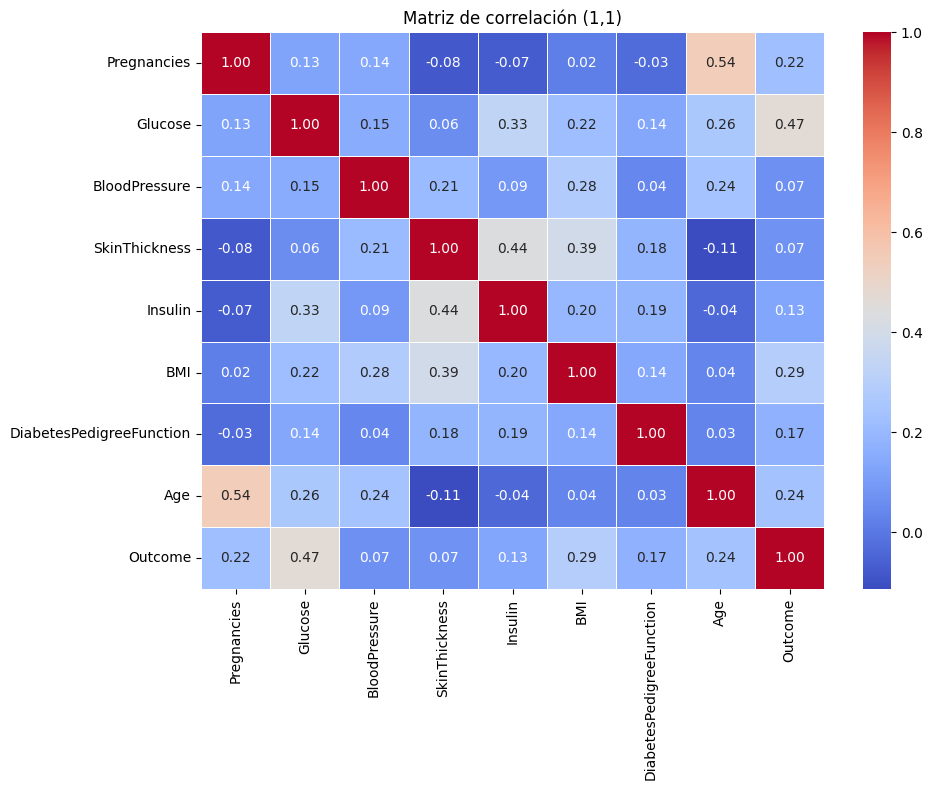

In [38]:
# FUNCIONA CUANDO LA MATRIZ ES ENORME
# Obtener matriz de correlación solo con variables numéricas
corr_matrix = data.select_dtypes(include=['number']).corr()

# Tamaño del bloque en cada página
page_size = 10  
num_vars = len(corr_matrix)
num_pages = int(np.ceil(num_vars / page_size))  # Número total de páginas en cada dirección

# Iterar sobre bloques de filas
for row_page in range(num_pages):
    row_start = row_page * page_size
    row_end = min(row_start + page_size, num_vars)

    # Iterar sobre bloques de columnas
    for col_page in range(num_pages):
        col_start = col_page * page_size
        col_end = min(col_start + page_size, num_vars)

        # Extraer la submatriz de correlación para esta página
        sub_corr_matrix = corr_matrix.iloc[row_start:row_end, col_start:col_end]

        # Graficar el heatmap de la submatriz
        plt.figure(figsize=(10, 8))
        sns.heatmap(sub_corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

        plt.title(f'Matriz de correlación ({row_page+1},{col_page+1})')
        plt.tight_layout()
        plt.show()

In [39]:
# CUANDO SEA UNA MATRIZ DE CORRELACIÓN MEDIA
# # Calcular la matriz de correlación solo con columnas numéricas
# corr_matrix = data.select_dtypes(include=['number']).corr()

# # Obtener la cantidad de columnas y dividir en dos grupos
# num_cols = len(corr_matrix.columns)
# mid_point = num_cols // 2  # Punto medio para dividir

# cols_1 = corr_matrix.columns[:mid_point]  # Primera mitad
# cols_2 = corr_matrix.columns[mid_point:]  # Segunda mitad

# # Crear dos figuras separadas
# fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# # Heatmap de la primera mitad de columnas
# sns.heatmap(corr_matrix.loc[cols_1, cols_1], annot=False, fmt=".2f", cmap="coolwarm", linewidths=0.5, ax=axes[0])
# axes[0].set_title("Matriz de correlación - Parte 1")

# # Heatmap de la segunda mitad de columnas
# sns.heatmap(corr_matrix.loc[cols_2, cols_2], annot=False, fmt=".2f", cmap="coolwarm", linewidths=0.5, ax=axes[1])
# axes[1].set_title("Matriz de correlación - Parte 2")

# # Ajustar diseño
# plt.tight_layout()

# # Mostrar los gráficos
# plt.show()

In [40]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

El análisis de correlaciones refleja una fuerte relación directa entre los siguientes pares de correlaciones, debido al gran número de variables se toman aquellas que presentan una correlación superior al 0,5. Se presentan a continuación:

`emp.var.rate`: Presenta una fuerte correlación con `nr.employed, euribor3m y cons.price.idx` (0,91-0,97-0,78; respectivamente). Se trata de índices macroeconómicos por lo que tiene sentido que estén interrelacionados. Se puede considerar el unificar las 4 variables y crear un índice que indique el indice macroeconómico.
* emp.var.rate: Indica la salud del mercado laboral. Un aumento suele ser positivo para la confianza del consumidor.
* nr.employed: Similar a emp.var.rate, refleja la cantidad de personas con trabajo.
* euribor3m: Representa las tasas de interés, que afectan la capacidad de ahorro y la inversión.
* cons.price.idx: Mide la inflación, que erosiona el poder adquisitivo y afecta las decisiones financieras.

`poutcome`: Presenta una fuerte correlación con `previous` y una correlación inversa con `pdays, emp.var.rate, euribor3m, nr.employed`. La correlación positiva tiene sentido porque estamos comparando el resultado de marketing de la campaña anterior con el número de contactos con la campaña anterior, por un lado, el resultado de la campaña de marketing dependió del número de días que transcurrieron desde la última campaña hasta que fue contactado, es decir, que un resultado exitoso en campañas anteriores suele ocurrir cuando ha pasado menos tiempo desde la última campaña. Por otro lado, la correlación inversa con `pdays, emp.var.rate, euribor3m, nr.employed`, los 3 mencionados hacen referencia a aspectos macroeconómicos que afectan a la solvencia financiera del cliente, es decir cuando se producen contextos macroeconómicos de menor crecimiento económico es cuando más éxito ha tenido una campaña.

***



Se decide comentar el pairplot ya que en este caso no va a aportar valor.

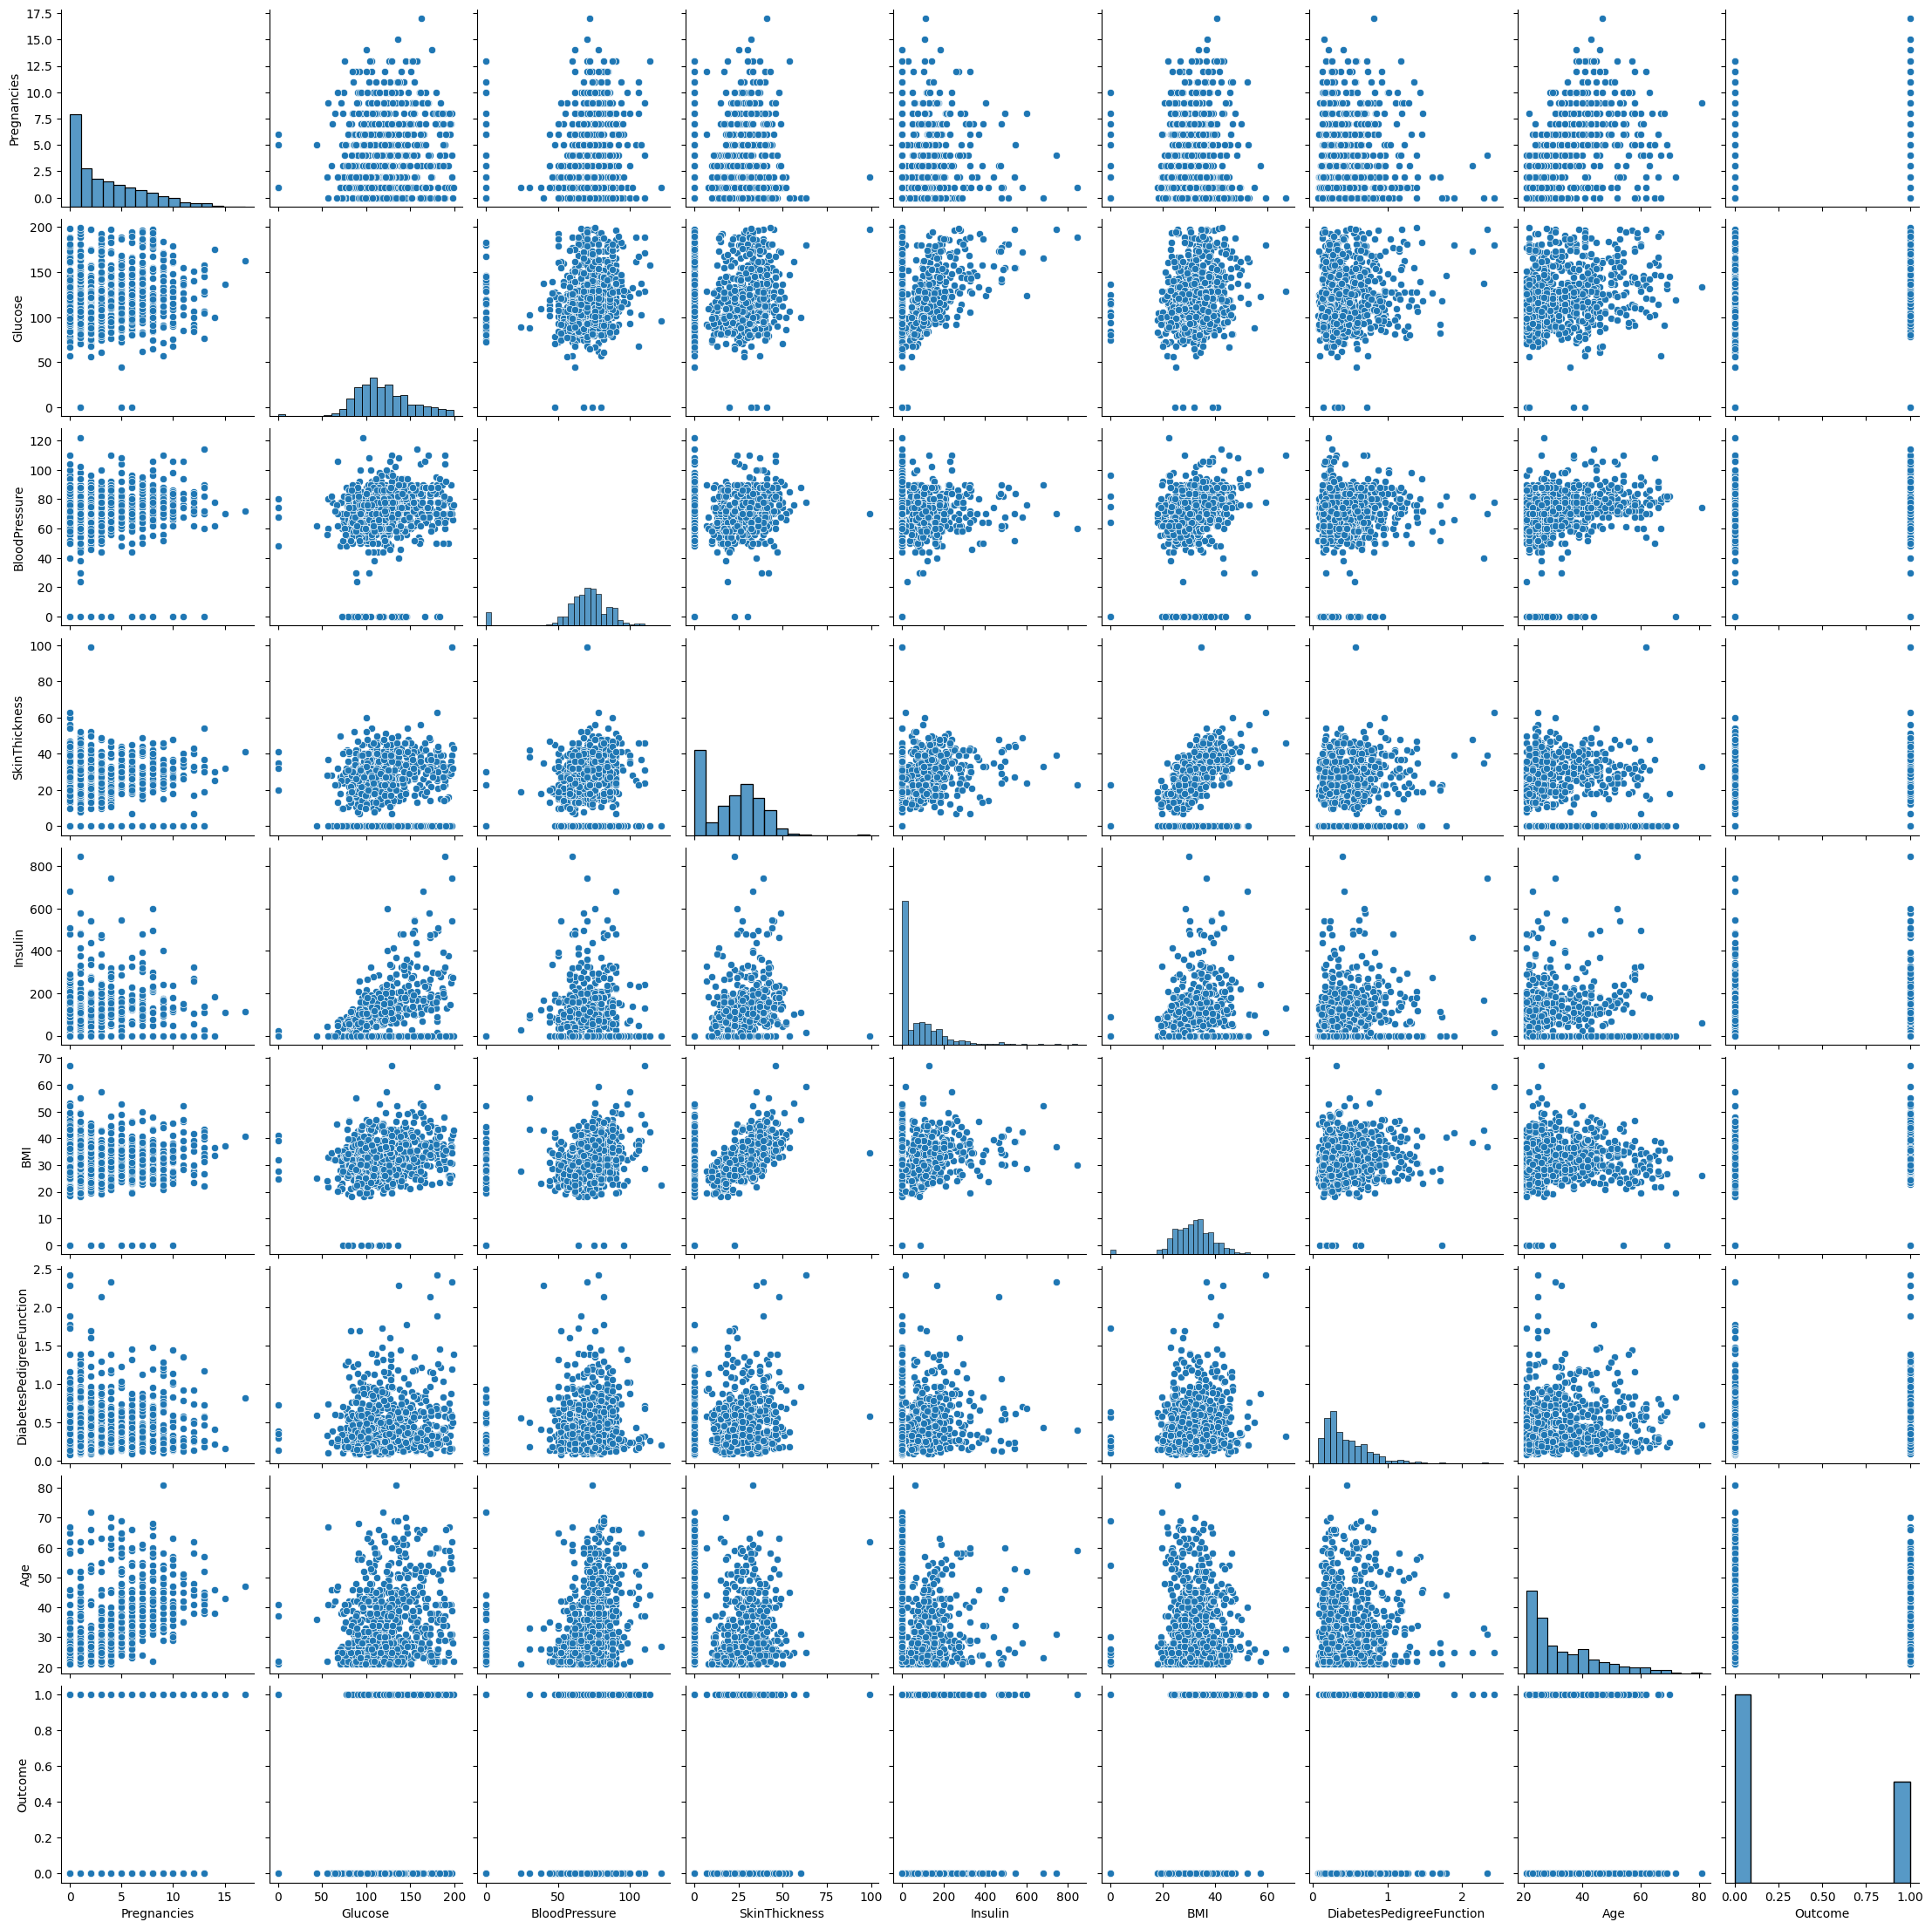

In [41]:
sns.pairplot(data = data)

### Paso 5: Ingeniería de características

#### Análisis de outliers

In [42]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [43]:
columns_number = data.select_dtypes(include='number')

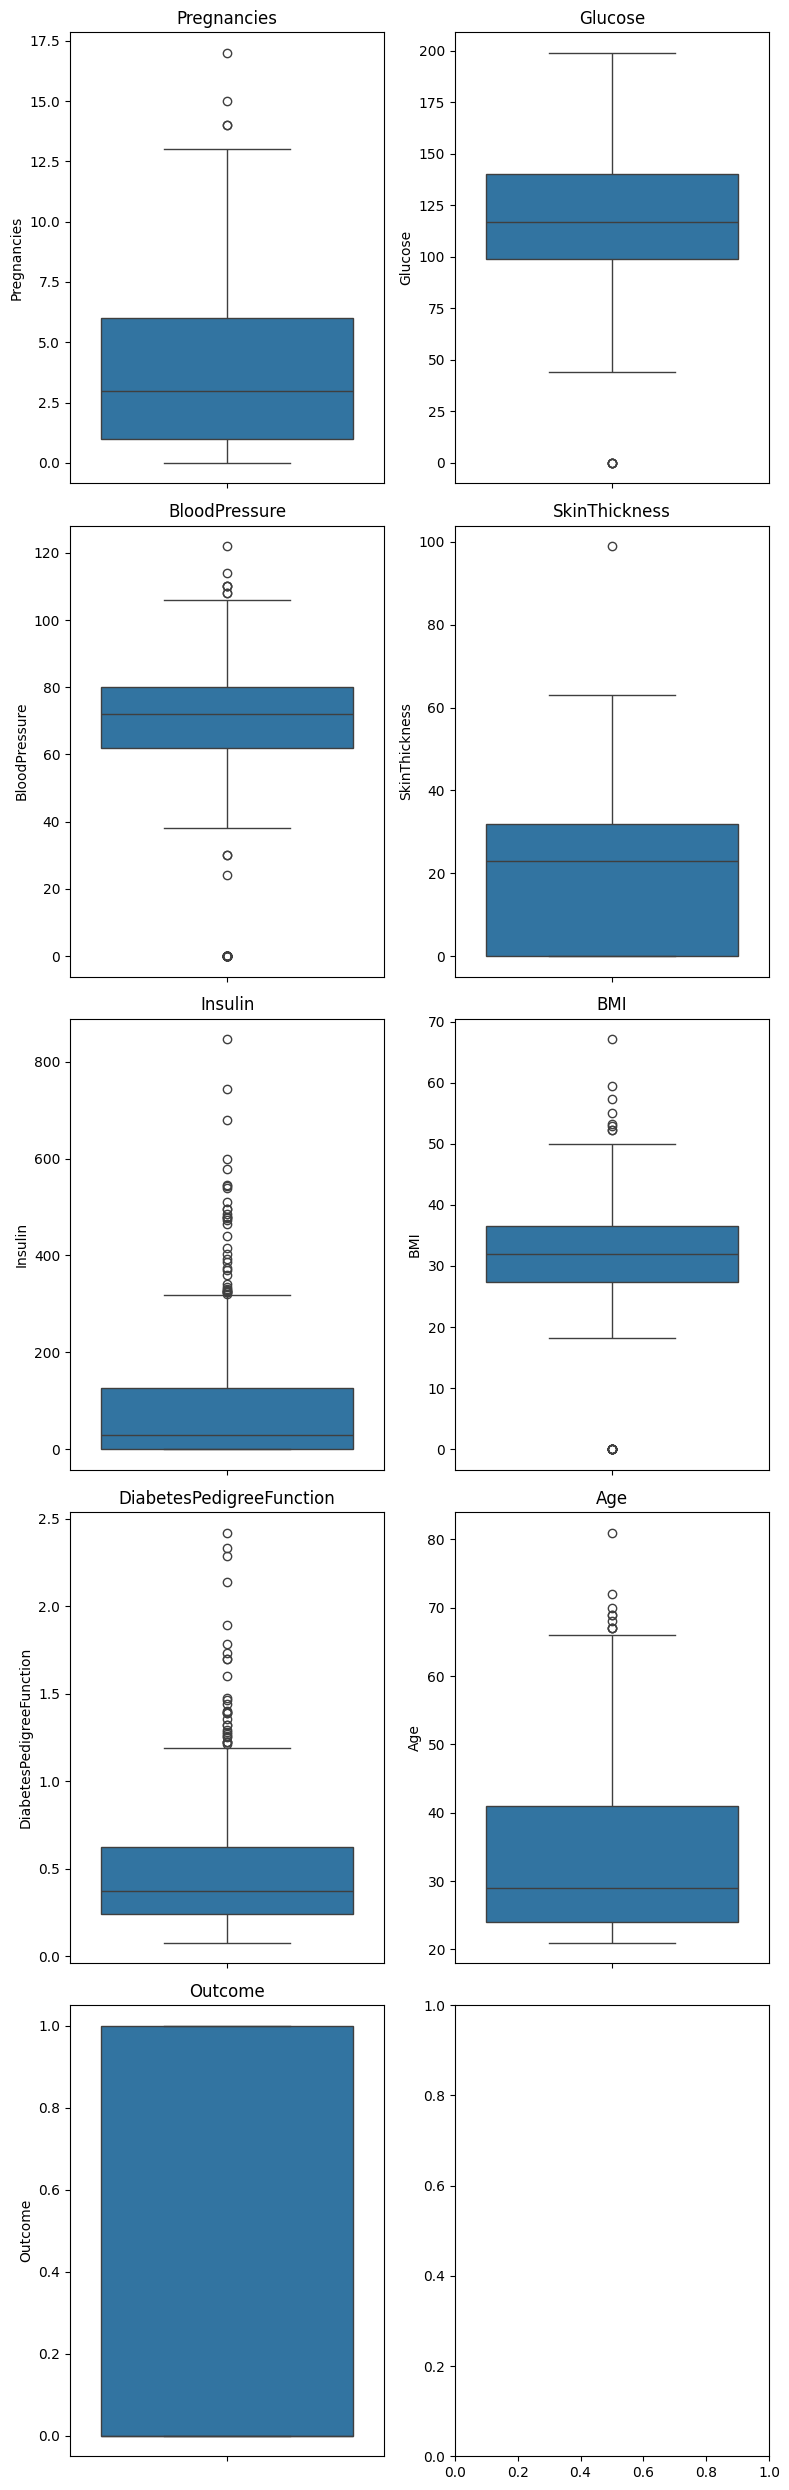

In [44]:
# Separar los gráficos en impares y pares
columns_odd = [col for i, col in enumerate(columns_number) if i % 2 != 0]  # Gráficos con índice impar (1, 3, 5,...)
columns_even = [col for i, col in enumerate(columns_number) if i % 2 == 0]  # Gráficos con índice par (0, 2, 4,...)

# Número de filas necesarias (igual a la cantidad máxima de gráficos en ambos grupos)
num_rows = max(len(columns_odd), len(columns_even))

# Crear la figura y los subgráficos
fig, axis = plt.subplots(num_rows, 2, figsize=(8, 5*num_rows))

# Graficar los gráficos impares (a la izquierda)
for i, col in enumerate(columns_even):
    sns.boxplot(ax=axis[i, 0], data=data, y=col)
    axis[i, 0].set_title(col)

# Graficar los gráficos pares (a la derecha)
for i, col in enumerate(columns_odd):
    sns.boxplot(ax=axis[i, 1], data=data, y=col)
    axis[i, 1].set_title(col)

# sns.boxplot(ax = axis[0, 1], data = data, y = "minimum_nights")
# sns.boxplot(ax = axis[0, 2], data = data, y = "number_of_reviews")
# sns.boxplot(ax = axis[1, 0], data = data, y = "reviews_per_month")
# sns.boxplot(ax = axis[1, 1], data = data, y = "calculated_host_listings_count")
# sns.boxplot(ax = axis[1, 2], data = data, y = "availability_365")
# sns.boxplot(ax = axis[2, 0], data = data, y = "neighbourhood_group_n")
# sns.boxplot(ax = axis[2, 1], data = data, y = "room_type_n")
# sns.boxplot(ax = axis[2, 2], data = data, y = "neighbourhood_n")

plt.tight_layout()

plt.show()

In [45]:
data.select_dtypes(include='number').columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [46]:
import json

total_data_con_outliers = data.copy()
total_data_sin_outliers = data.copy()
def convert_to_standard_types(obj):
  if isinstance(obj, np.int64):  # Convertir numpy.int64 a int
      return int(obj)
  elif isinstance(obj, np.float64):  # Convertir numpy.float64 a float
      return float(obj)
  
def replace_outliers_from_column(column, df):
  column_stats = df[column].describe()
  
  column_iqr = column_stats["75%"] - column_stats["25%"]
  # print("Column IQR:",column_iqr)
  # print("25%:",column_stats["25%"])
  upper_limit = column_stats["75%"] + 1.5 * column_iqr
  lower_limit = column_stats["25%"] - 1.5 * column_iqr
  lower_limit = max(df[column].min(),lower_limit)
  #print(lower_limit)
  
  # Remove upper outliers
  df[column] = df[column].apply(lambda x: x if (x <= upper_limit) else upper_limit)
  # Remove lower outliers
  df[column] = df[column].apply(lambda x: x if (x >= lower_limit) else lower_limit)
  
  return df.copy(), [lower_limit, upper_limit]
def replace_outliers_from_column_with_clip(column, df):
  column_stats = df[column].describe()
  
  column_iqr = column_stats["75%"] - column_stats["25%"]
  # print("Column IQR:",column_iqr)
  # print("25%:",column_stats["25%"])
  upper_limit = column_stats["75%"] + 1.5 * column_iqr
  lower_limit = column_stats["25%"] - 1.5 * column_iqr
  lower_limit = max(df[column].min(),lower_limit)
  # print(lower_limit)
  
  # Remove upper outliers
  df[column] = df[column].clip(lower=lower_limit, upper=upper_limit)
  
  
  return df.copy(), [lower_limit, upper_limit]
outliers_dict = {}
for column in columns_number:
  total_data_sin_outliers, limits_list = replace_outliers_from_column(column, total_data_sin_outliers)
  outliers_dict[column] = limits_list

outliers_dict_standard = convert_to_standard_types(outliers_dict)

with open(path_config+"/outliers_replacement.json", "w") as f:
  json.dump(outliers_dict_standard, f)
outliers_dict

{'Pregnancies': [np.int64(0), np.float64(13.5)],
 'Glucose': [np.float64(37.125), np.float64(202.125)],
 'BloodPressure': [np.float64(35.0), np.float64(107.0)],
 'SkinThickness': [np.int64(0), np.float64(80.0)],
 'Insulin': [np.int64(0), np.float64(318.125)],
 'BMI': [np.float64(13.35), np.float64(50.550000000000004)],
 'DiabetesPedigreeFunction': [np.float64(0.078), np.float64(1.2)],
 'Age': [np.int64(21), np.float64(66.5)],
 'Outcome': [np.int64(0), np.float64(2.5)]}

In [47]:
total_data_sin_outliers.dtypes

Pregnancies                 float64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
Outcome                       int64
dtype: object

In [48]:
total_data_con_outliers.isnull().sum().sort_values(ascending=False)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [49]:
columns_na_con_outliers = total_data_con_outliers.loc[:,total_data_con_outliers.isnull().any()].columns



In [50]:
total_data_sin_outliers.isnull().sum().sort_values(ascending=False)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [51]:
columns_na_sin_outliers = total_data_sin_outliers.loc[:,total_data_sin_outliers.isnull().any()].columns

In [52]:
def replace_na_with_mean(columns_na_outliers, total_data, con_outliers="con"):
    total_data = total_data.copy()
    for na_outlier in columns_na_outliers:
        if na_outlier in total_data.columns:    # si la columna no está en el DF
            total_data[na_outlier] = total_data[na_outlier].fillna(
                total_data[na_outlier].mean()
            )
        else:
            print("La columna no se encuentra en el DataFrame: Revisa que tiene los nombres correctos")
    print(f"Se han rellenado los NAs en total_data_{con_outliers}_outliers")
    return total_data

if(not columns_na_con_outliers.empty):
    total_data_con_outliers = replace_na_with_mean(columns_na_con_outliers,total_data=total_data_con_outliers)
if(not columns_na_sin_outliers.empty):    
    total_data_sin_outliers = replace_na_with_mean(columns_na_sin_outliers, total_data=total_data_sin_outliers,con_outliers="sin")

In [53]:
total_data_con_outliers.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [54]:
total_data_sin_outliers.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Vemos cómo los valores han sido imputados correctamente y ya no existen faltantes.

#### Inferencia de nuevas características

Otro uso típico en esta ingeniería es la de la obtención de nuevas características mediante la "fusión" de dos o más ya existentes. Uniendo estas dos variables y sumándolas/multiplicando/operación matemática/etc podemos obtener una tercera. En nuestro caso no lo hacemos ya que son variables que no se podría hacer dicha fusión. 

`¿Sería posible concatenar los números de aquellas categóricas? En principio si¿Habría que hacerlo en aquellas con una alta correlación entre sí? No tiene nada que ver con la correlación ¿se mantendrían el resto de variables de antes de la fusión? No se mantendrían`

In [55]:
total_data_con_outliers.sort_values(by=target ,ascending=False)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
236,7,181,84,21,192,35.9,0.586,51,1
2,8,183,64,0,0,23.3,0.672,32,1
237,0,179,90,27,0,44.1,0.686,23,1
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
96,2,92,62,28,0,31.6,0.130,24,0


In [56]:
# DEFINIR LA INFERENCIA DE LA NUEVA CARACTERÍSTICA [NECESARIO FACTOR HUMANO - OPCIONAL]]
# Inferencia de nuevas características




In [57]:
columns_drop = []


#### Escalado de valores

In [58]:
from sklearn.model_selection import train_test_split

#num_variables = total_data_con_outliers.select_dtypes(include='number').drop(columns=[target] + exclude_new_features).columns.to_list()
num_variables = total_data_con_outliers.select_dtypes(include='number').drop(columns=[target]+ columns_drop).columns.to_list()
# Dividimos el conjunto de datos en muestras de train y test
X_con_outliers = total_data_con_outliers.drop(columns=target, axis = 1)[num_variables]
X_sin_outliers = total_data_sin_outliers.drop(columns=target, axis = 1)[num_variables]
y = total_data_con_outliers[target]

X_train_con_outliers, X_test_con_outliers, y_train, y_test = train_test_split(X_con_outliers, y, test_size = 0.2, random_state = 42)
X_train_sin_outliers, X_test_sin_outliers = train_test_split(X_sin_outliers, test_size = 0.2, random_state = 42)



# GUARDAR LOS DATASETS
X_train_con_outliers.to_excel(os.path.join(current_dir,"../data/processed/X_train_con_outliers.xlsx"), index = False)
X_train_sin_outliers.to_excel(os.path.join(current_dir,"../data/processed/X_train_sin_outliers.xlsx"), index = False)
X_test_con_outliers.to_excel(os.path.join(current_dir,"../data/processed/X_test_con_outliers.xlsx"), index = False)
X_test_sin_outliers.to_excel(os.path.join(current_dir,"../data/processed/X_test_sin_outliers.xlsx"), index = False)
y_train.to_excel(os.path.join(current_dir,"../data/processed/y_train.xlsx"), index = False)
y_test.to_excel(os.path.join(current_dir,"../data/processed/y_test.xlsx"), index = False)

X_train_con_outliers.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0,0,0.0,0.304,21
618,9,112,82,24,0,28.2,1.282,50
346,1,139,46,19,83,28.7,0.654,22
294,0,161,50,0,0,21.9,0.254,65
231,6,134,80,37,370,46.2,0.238,46


#### Normalización Funciones

In [59]:
import pickle
from sklearn.preprocessing import StandardScaler
print(type(X_train_con_outliers),type(X_test_con_outliers))
def normalize_dataframe_and_save(type_scaler, X_train, X_test, num_variables, scaler="Standard", con_outliers = "con"):
    ### NORMALIZAMOS EL DATAFRAME CON OUTLIERS Y LO GUARDAMOS
    #scaler_con_outliers = StandardScaler()
    type_scaler.fit(X_train)
    os.makedirs(os.path.join(current_dir,f"../models/"), exist_ok=True)
    
    with open(f"../models/scaler_{con_outliers}_outliers_{scaler.lower()}.pkl", "wb") as file:
        pickle.dump(type_scaler, file)
    X_train_norm = type_scaler.transform(X_train)
    X_train_norm = pd.DataFrame(X_train_norm, index = X_train.index, columns = num_variables)

    X_test_norm = type_scaler.transform(X_test)
    X_test_norm = pd.DataFrame(X_test_norm, index = X_test.index, columns = num_variables)

    # GUARDAR LOS DATASETS
    if((scaler.lower() == "standard") | (scaler.lower() == "minmax")):
        X_train_norm.to_excel(os.path.join(current_dir,f"../data/processed/X_train_{con_outliers}_outliers_norm_{scaler.lower()}.xlsx"), index = False)
        X_test_norm.to_excel(os.path.join(current_dir,f"../data/processed/X_test_{con_outliers}_outliers_norm_{scaler.lower()}.xlsx"), index = False)
    else:
        print("Error al indicar el escalado")
    return X_train_norm.copy(), X_test_norm.copy()

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


##### Normalización

Escalado Con Outliers

In [60]:
type_scaler = StandardScaler()
# Normalización Estándar Con Outliers
print(type(type_scaler))
X_train_con_outliers_norm_standard, X_test_con_outliers_norm_standard = normalize_dataframe_and_save(
    type_scaler=type_scaler, 
    X_train = X_train_con_outliers, 
    X_test = X_test_con_outliers, 
    num_variables = num_variables, 
    scaler="Standard",
    con_outliers = "con")
X_train_con_outliers_norm_standard.head()
# Normalización Estándar Sin Outliers
X_train_sin_outliers_norm_standard, X_test_sin_outliers_norm_standard = normalize_dataframe_and_save(
    type_scaler=type_scaler, 
    X_train = X_train_sin_outliers, 
    X_test = X_test_sin_outliers, 
    num_variables = num_variables, 
    scaler="Standard",
    con_outliers = "sin")
# Print Xtrain con Outliers normalizado
X_train_sin_outliers_norm_standard.head()

<class 'sklearn.preprocessing._data.StandardScaler'>


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,-0.528662,-1.197609,-2.578159,-1.322774,-0.808061,-2.675470,-0.531720,-1.046838
618,1.606853,-0.295149,0.808146,0.233505,-0.808061,-0.553023,2.644625,1.513601
346,-0.833735,0.575081,-1.785619,-0.090720,0.088230,-0.481560,0.709040,-0.958547
294,-1.138809,1.284156,-1.497423,-1.322774,-0.808061,-1.453455,-0.708971,2.837966
231,0.691632,0.413927,0.664048,1.076490,2.627271,2.019641,-0.765691,1.160437


In [61]:
## APUNTES
# from sklearn.preprocessing import StandardScaler

# ### NORMALIZAMOS EL DATAFRAME CON OUTLIERS Y LO GUARDAMOS
# scaler_con_outliers = StandardScaler()
# scaler_con_outliers.fit(X_train_con_outliers)

# X_train_con_outliers_norm = scaler_con_outliers.transform(X_train_con_outliers)
# X_train_con_outliers_norm = pd.DataFrame(X_train_con_outliers_norm, index = X_train_con_outliers.index, columns = num_variables)

# X_test_con_outliers_norm = scaler_con_outliers.transform(X_test_con_outliers)
# X_test_con_outliers_norm = pd.DataFrame(X_test_con_outliers_norm, index = X_test_con_outliers.index, columns = num_variables)

# # GUARDAR LOS DATASETS
# X_train_con_outliers_norm.to_excel("../data/processed/X_train_con_outliers_norm.xlsx", index = False)
# X_test_con_outliers_norm.to_excel("../data/processed/X_test_con_outliers_norm.xlsx", index = False)

# ### NORMALIZAMOS EL DATAFRAME SIN OUTLIERS Y LO GUARDAMOS
# scaler_sin_outliers = StandardScaler()
# scaler_sin_outliers.fit(X_train_sin_outliers)

# X_train_sin_outliers_norm = scaler_sin_outliers.transform(X_train_sin_outliers)
# X_train_sin_outliers_norm = pd.DataFrame(X_train_sin_outliers_norm, index = X_train_sin_outliers.index, columns = num_variables)

# X_test_sin_outliers_norm = scaler_sin_outliers.transform(X_test_sin_outliers)
# X_test_sin_outliers_norm = pd.DataFrame(X_test_sin_outliers_norm, index = X_test_sin_outliers.index, columns = num_variables)

# # GUARDAR LOS DATASETS
# X_train_sin_outliers_norm.to_excel("../data/processed/X_train_sin_outliers_norm.xlsx", index = False)
# X_test_sin_outliers_norm.to_excel("../data/processed/X_test_sin_outliers_norm.xlsx", index = False)

# X_train_con_outliers_norm.head()

##### Escalado Mínimo-Máximo

In [62]:
from sklearn.preprocessing import MinMaxScaler
type_scaler = MinMaxScaler()
print(type(type_scaler))
# Escalado Min-Max con outliers - Acotado entre 0-1
X_train_con_outliers_norm_minmax, X_test_con_outliers_norm_minmax = normalize_dataframe_and_save(
    type_scaler = type_scaler, 
    X_train = X_train_con_outliers, 
    X_test = X_test_con_outliers, 
    num_variables = num_variables, 
    scaler="MinMax",
    con_outliers = "con")
# Escalado Min-Max sin outliers - Acotado entre 0-1
X_train_sin_outliers_norm_minmax, X_test_sin_outliers_norm_minmax = normalize_dataframe_and_save(
    type_scaler = type_scaler, 
    X_train = X_train_sin_outliers, 
    X_test = X_test_sin_outliers, 
    num_variables = num_variables, 
    scaler="MinMax",
    con_outliers = "sin")
# Print data
X_train_sin_outliers_norm_minmax.head()

<class 'sklearn.preprocessing._data.MinMaxScaler'>


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,0.148148,0.289575,0.000000,0.000000,0.000000,0.000000,0.201426,0.000000
618,0.666667,0.462548,0.652778,0.380952,0.000000,0.399194,1.000000,0.637363
346,0.074074,0.629344,0.152778,0.301587,0.260904,0.412634,0.513369,0.021978
294,0.000000,0.765251,0.208333,0.000000,0.000000,0.229839,0.156863,0.967033
231,0.444444,0.598456,0.625000,0.587302,1.000000,0.883065,0.142602,0.549451


In [63]:
## APUNTES
# from sklearn.preprocessing import MinMaxScaler

# ### NORMALIZAMOS EL DATAFRAME CON OUTLIERS Y LO GUARDAMOS
# scaler_con_outliers = MinMaxScaler()
# scaler_con_outliers.fit(X_train_con_outliers)

# X_train_con_outliers_scal = scaler_con_outliers.transform(X_train_con_outliers)
# X_train_con_outliers_scal = pd.DataFrame(X_train_con_outliers_scal, index = X_train_con_outliers.index, columns = num_variables)

# X_test_con_outliers_scal = scaler_con_outliers.transform(X_test_con_outliers)
# X_test_con_outliers_scal = pd.DataFrame(X_test_con_outliers_scal, index = X_test_con_outliers.index, columns = num_variables)

# # GUARDAR LOS DATASETS
# X_train_con_outliers_scal.to_excel("../data/processed/X_train_con_outliers_scal.xlsx", index = False)
# X_test_con_outliers_scal.to_excel("../data/processed/X_test_con_outliers_scal.xlsx", index = False)

# ### ESCALAMOS EL DATAFRAME SIN OUTLIERS Y LO GUARDAMOS
# scaler_sin_outliers = StandardScaler()
# scaler_sin_outliers.fit(X_train_sin_outliers)

# X_train_sin_outliers_scal = scaler_sin_outliers.transform(X_train_sin_outliers)
# X_train_sin_outliers_scal = pd.DataFrame(X_train_sin_outliers_scal, index = X_train_sin_outliers.index, columns = num_variables)

# X_test_sin_outliers_scal = scaler_sin_outliers.transform(X_test_sin_outliers)
# X_test_sin_outliers_scal = pd.DataFrame(X_test_sin_outliers_scal, index = X_test_sin_outliers.index, columns = num_variables)

# # GUARDAR LOS DATASETS
# X_train_sin_outliers_scal.to_excel("../data/processed/X_train_sin_outliers_scal.xlsx", index = False)
# X_test_sin_outliers_scal.to_excel("../data/processed/X_test_sin_outliers_scal.xlsx", index = False)

# X_train_con_outliers_scal.head()

## DÍA 3

### Paso 6: Selección de características

La **selección de características** (*feature selection*) es un proceso que implica seleccionar las características (variables) más relevantes de nuestro conjunto de datos para usarlas en la construcción de un modelo de Machine Learning, desechando el resto.

Existen varias razones para incluirlo en nuestro análisis exploratorio:

1. Simplificar el modelo para que sea más fácil de entender e interpretar.
2. Reducir el tiempo de entrenamiento del modelo.
3. Evitar el sobre ajuste al reducir la dimensionalidad del modelo y minimizar el ruido y las correlaciones innecesarias.
4. Mejorar el rendimiento del modelo al eliminar las características irrelevantes.

Además, existen diversas técnicas para la selección de características. Muchas de ellas se basan a su vez en modelos supervisados, entrenados o de clustering, tienes más información [aquí](https://github.com/4GeeksAcademy/machine-learning-content/blob/master/05-data/feature-selection.es.md).

La librería `sklearn` contiene gran parte de las mejores alternativas para llevarla a cabo. Una de las herramientas que más se utilizan para realizar procesos de selección de características rápidos y con buenos resultados es `SelectKBest`. Esta función selecciona las `k` mejores características de nuestro conjunto de datos basándose en una función de un test estadístico. Este test estadístico normalmente es un ANOVA o un Chi-Cuadrado:

In [64]:
from sklearn.feature_selection import f_classif, SelectKBest
def select_characteristics(X_train_con_outliers, X_test_con_outliers, y_train, y_test, k = 5, with_outliers="with_outliers", with_norm="standard"):
  # Con un valor de k = 5 decimos implícitamente que queremos eliminar 2 características del conjunto de datos
  k = min(k, X_train_con_outliers.shape[1]) # asegurar que el mínimo sea 5 o el mínimo de columnas que haya, por si hay menos
  selection_model = SelectKBest(f_classif, k = k)
  selection_model.fit(X_train_con_outliers, y_train)

  ix = selection_model.get_support()
  X_train_sel = pd.DataFrame(selection_model.transform(X_train_con_outliers), columns = X_train_con_outliers.columns.values[ix])
  X_test_sel = pd.DataFrame(selection_model.transform(X_test_con_outliers), columns = X_test_con_outliers.columns.values[ix])

  # GUARDO X_train_sel.columns

  # name_files = ["with_outliers_without_norm", "without_outliers_without_norm","with_outliers_with_norm", "without_outliers_with_norm"] # name files
  # for col in name_files:

  with open(path_config+f"/feature_selection_k_{k}_{with_outliers}_with_norm_{with_norm}.json", "w") as f:
    json.dump(X_train_sel.columns.tolist(), f)
  # GUARDO EL "Y" EN EL DATAFRAME
  X_train_sel = X_train_sel.copy()
  X_test_sel = X_test_sel.copy()
  # X_train_sel[target] = list(y_train)
  # X_test_sel[target] = list(y_test)
  # GUARDAR EL ARCHIVO LIMPIO
  
  os.makedirs(os.path.join(current_dir,f"../data/processed/assets"), exist_ok=True)
  X_train_sel.to_csv(os.path.join(current_dir,f"../data/processed/assets/clean_{with_outliers}_{with_norm}_train_k_{k}.csv"), index=False)
  X_test_sel.to_csv(os.path.join(current_dir,f"../data/processed/assets/clean_{with_outliers}_{with_norm}_test_k_{k}.csv"), index=False)

  return X_train_sel, X_test_sel

In [68]:
# Se escoge un k=8, el que más precisión tiene en el Logistic Regression es Con Outliers (de entre con Outliers y Sin Outliers)
X_train_sel_with_outliers_without_norm, X_test_sel_with_outliers_without_norm = select_characteristics(X_train_sin_outliers,X_test_sin_outliers, y_train, y_test, k=4, with_outliers="without_outliers", with_norm="")

La selección de características, al igual que el entrenamiento del modelo en general, se debe realizar solo en el conjunto de datos de entrenamiento y no en la totalidad. Si la llevásemos a cabo en todo el conjunto, podríamos introducir un sesgo que se conoce como **contaminación de datos** (*data leakage*), que ocurre cuando la información del conjunto de prueba se utiliza para tomar decisiones durante el entrenamiento, lo que puede llevar a una estimación demasiado optimista del rendimiento del modelo.

Por eso, la mejor práctica es dividir los datos en dos conjuntos: de entrenamiento y de prueba antes de la selección de características, que se realizará solo con los datos de entrenamiento y que luego se aplicará a ambos. De esta manera, aseguramos que este proceso y el modelo están siendo validados de manera justa.

En este caso, utilizando la selección de características de Chi cuadrado, las características más importantes son `Pclass`, `Sex`, `Parch`, `Fare` y `Embarked`.

## FIN DEL DÍA 3

Ahora ya conocemos cómo llevar a cabo un estudio profundo y en detalle para conocer completamente nuestro conjunto de datos. Recordemos los pasos que tenemos que seguir para llevarlo a cabo:

- Paso 1: Planteamiento del problema y recopilación de datos
- Paso 2: Exploración y limpieza de datos
- Paso 3: Análisis de variables univariante
- Paso 4: Análisis de variables multivariante
- Paso 5: Ingeniería de características
- Paso 6: Selección de características

Tras la implementación y adopción de estos pasos, estaremos preparados para entrenar el modelo.